In [74]:
# Import our dependencies
import pandas as pd
import seaborn as sb
from pathlib import Path
import matplotlib.pyplot as plt
import sklearn as skl
import tensorflow as tf
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline



In [32]:
original_loan_df = pd.read_csv("loan_dataset.csv")

original_loan_df.describe()

,Applicant_ID,Age,Dependents,Annual_Income,Monthly_Expenses,Credit_Score,Existing_Loans,Total_Existing_Loan_Amount,Outstanding_Debt,Loan_History,Loan_Amount_Requested,Loan_Term,Interest_Rate,Bank_Account_History,Transaction_Frequency,Default_Risk,Loan_Approval_Status
count,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000
mean,26000.500000,38.898385,1.498000,83588.474404,2748.064885,678.089019,0.997865,24939.087962,14984.864923,0.198596,21102.765481,125.827019,9.253494,4.503923,17.031808,0.500204,0.641654
std,15011.251336,10.553928,1.118077,35720.851522,1295.678763,159.990367,0.815586,14407.886552,8663.404305,0.398947,8224.940906,65.509959,3.318356,2.872721,7.212011,0.289939,0.479519
min,1.000000,18.000000,0.000000,20009.000000,500.000000,300.000000,0.000000,0.000000,0.000000,0.000000,5000.000000,12.000000,3.500000,0.000000,5.000000,0.000000,0.000000
25%,13000.750000,31.000000,0.000000,55564.000000,1636.000000,553.000000,0.000000,12498.000000,7511.750000,0.000000,16941.750000,69.000000,6.400000,2.000000,11.000000,0.250000,0.000000
50%,26000.500000,38.000000,1.000000,78839.000000,2739.000000,742.000000,1.000000,24964.000000,14984.500000,0.000000,21039.000000,126.000000,9.240000,5.000000,17.000000,0.500000,1.000000
75%,39000.250000,45.000000,2.000000,114226.000000,3866.000000,796.000000,2.000000,37399.500000,22432.250000,0.000000,25809.000000,182.000000,12.140000,7.000000,23.000000,0.750000,1.000000
max,52000.000000,69.000000,3.000000,149998.000000,4999.000000,849.000000,2.000000,49999.000000,29998.000000,1.000000,44848.000000,239.000000,15.000000,9.000000,29.000000,1.000000,1.000000


In [33]:
original_loan_df.head(10)


,Applicant_ID,Gender,Age,Marital_Status,Dependents,Education,Employment_Status,Occupation_Type,Residential_Status,City/Town,Annual_Income,Monthly_Expenses,Credit_Score,Existing_Loans,Total_Existing_Loan_Amount,Outstanding_Debt,Loan_History,Loan_Amount_Requested,Loan_Term,Loan_Purpose,Interest_Rate,Loan_Type,Co-Applicant,Bank_Account_History,Transaction_Frequency,Default_Risk,Loan_Approval_Status
0,1,Female,25,Married,2,Graduate,Employed,Business,Own,Urban,139901,2533,743,0,10942,19822,0,24535,209,Home,4.27,Secured,Yes,8,20,0.81,1
1,2,Male,36,Married,2,High School,Employed,Business,Own,Suburban,21162,4041,468,1,48731,18321,0,8288,33,Home,14.78,Unsecured,Yes,9,9,0.17,0
2,3,Male,43,Single,0,Postgraduate,Self-Employed,Freelancer,Own,Urban,27815,3453,389,2,6925,13851,0,10308,159,Vehicle,12.33,Secured,Yes,7,27,0.25,0
3,4,Female,28,Married,0,High School,Self-Employed,Freelancer,Rent,Suburban,137853,2732,778,0,42016,28608,1,33937,39,Personal,8.77,Secured,No,9,16,0.27,1
4,5,Female,32,Single,0,Graduate,Employed,Salaried,Rent,Suburban,81753,1648,752,2,31747,8780,1,23360,34,Home,9.04,Unsecured,No,1,17,0.32,1
5,6,Male,49,Single,2,Postgraduate,Employed,Freelancer,Own,Urban,149372,2976,793,0,2635,4453,0,30056,111,Education,4.98,Unsecured,Yes,4,14,0.99,1
6,7,Female,41,Married,0,High School,Employed,Salaried,Own,Rural,123266,1118,707,0,15843,28872,0,34707,192,Personal,7.35,Unsecured,Yes,2,13,0.56,1
7,8,Female,52,Single,2,Postgraduate,Employed,Business,Own,Urban,59889,4622,349,2,12436,29440,0,10583,81,Vehicle,13.49,Unsecured,No,4,21,0.45,0
8,9,Male,27,Single,1,Graduate,Self-Employed,Freelancer,Rent,Urban,121626,2511,803,0,9919,13940,0,20239,101,Home,13.53,Secured,Yes,4,18,0.54,0
9,10,Male,61,Single,3,Postgraduate,Employed,Freelancer,Own,Urban,38330,4523,599,2,4325,19381,0,15084,164,Personal,14.07,Secured,No,4,19,0.22,1


In [34]:
unique_values = original_loan_df.dtypes.index.tolist()
original_loan_df[unique_values].nunique()

Applicant_ID                  52000
Gender                            2
Age                              52
Marital_Status                    3
Dependents                        4
Education                         3
Employment_Status                 3
Occupation_Type                   4
Residential_Status                3
City/Town                         3
Annual_Income                 42408
Monthly_Expenses               4500
Credit_Score                    450
Existing_Loans                    3
Total_Existing_Loan_Amount    32440
Outstanding_Debt              24717
Loan_History                      2
Loan_Amount_Requested         22433
Loan_Term                       228
Loan_Purpose                      4
Interest_Rate                  1151
Loan_Type                         2
Co-Applicant                      2
Bank_Account_History             10
Transaction_Frequency            25
Default_Risk                    101
Loan_Approval_Status              2
dtype: int64

In [35]:
# Place 'Age' into bins 

In [36]:
# Place 'Annual_Income' into bins

In [37]:
# Place 'Monthly_Expenses' into bins

In [38]:
# Place 'Credit_Score' into bins

In [39]:
# Place 'Total_Existing_Loan_Amount' into bins

In [40]:
# Place 'Outstanding_Debt' into bins

In [41]:
# Place 'Loan_Amount_Requested' into bins

In [42]:
# Place 'Loan_Term' into bins

In [43]:
# Place 'Interest_Rate' into bins

In [44]:
# Place 'Bank_Account_History' into bins

In [45]:
# Place 'Transaction_Frequency' into bins

In [46]:
# Place 'Default_Risk' into bins

In [47]:
# Drop Applicant_ID column
index_loan_df = original_loan_df.drop(columns = ["Applicant_ID"])

# Convert categorical data to numeric with `pd.get_dummies`
original_loan_df_columns = index_loan_df.columns.to_list()
original_loan_df_columns.remove('Loan_Approval_Status')
original_loan_df_columns.remove('Age')
original_loan_df_columns.remove('Annual_Income')
original_loan_df_columns.remove('Monthly_Expenses')
original_loan_df_columns.remove('Credit_Score')
original_loan_df_columns.remove('Total_Existing_Loan_Amount')
original_loan_df_columns.remove('Outstanding_Debt')
original_loan_df_columns.remove('Loan_Amount_Requested')
original_loan_df_columns.remove('Loan_Term')
original_loan_df_columns.remove('Interest_Rate')
original_loan_df_columns.remove('Bank_Account_History')
original_loan_df_columns.remove('Transaction_Frequency')
original_loan_df_columns.remove('Default_Risk')

print(original_loan_df_columns)

['Gender', 'Marital_Status', 'Dependents', 'Education', 'Employment_Status', 'Occupation_Type', 'Residential_Status', 'City/Town', 'Existing_Loans', 'Loan_History', 'Loan_Purpose', 'Loan_Type', 'Co-Applicant']


In [48]:
# Convert categorical data to numeric with `pd.get_dummies`
df_encoded = pd.get_dummies(index_loan_df, columns = original_loan_df_columns)

# Convert True = 1 and False = 0
df_encoded = df_encoded.astype(int)

# Ability to scroll horizontally to view all columns of the dataframe
pd.options.display.max_columns=51

df_encoded

,Age,Annual_Income,Monthly_Expenses,Credit_Score,Total_Existing_Loan_Amount,Outstanding_Debt,Loan_Amount_Requested,Loan_Term,Interest_Rate,Bank_Account_History,Transaction_Frequency,Default_Risk,Loan_Approval_Status,Gender_Female,Gender_Male,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Education_Graduate,Education_High School,Education_Postgraduate,Employment_Status_Employed,Employment_Status_Self-Employed,Employment_Status_Unemployed,Occupation_Type_Business,Occupation_Type_Freelancer,Occupation_Type_Professional,Occupation_Type_Salaried,Residential_Status_Other,Residential_Status_Own,Residential_Status_Rent,City/Town_Rural,City/Town_Suburban,City/Town_Urban,Existing_Loans_0,Existing_Loans_1,Existing_Loans_2,Loan_History_0,Loan_History_1,Loan_Purpose_Education,Loan_Purpose_Home,Loan_Purpose_Personal,Loan_Purpose_Vehicle,Loan_Type_Secured,Loan_Type_Unsecured,Co-Applicant_No,Co-Applicant_Yes
0,25,139901,2533,743,10942,19822,24535,209,4,8,20,0,1,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1
1,36,21162,4041,468,48731,18321,8288,33,14,9,9,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,1
2,43,27815,3453,389,6925,13851,10308,159,12,7,27,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,1
3,28,137853,2732,778,42016,28608,33937,39,8,9,16,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0
4,32,81753,1648,752,31747,8780,23360,34,9,1,17,0,1,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51995,47,56085,1794,381,3338,11909,15723,60,12,2,26,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1
51996,25,79062,1371,726,23659,24696,21209,237,5,8,26,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,1,1,0
51997,48,57471,3442,396,4389,12367,10540,60,10,8,24,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,1,1,0
51998,48,49495,2874,362,25518,13240,16765,32,8,3,12,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,1


In [51]:
# Split our preprocessed data into our features and target arrays
X = df_encoded.copy()
X.drop("Loan_Approval_Status", axis=1, inplace=True)
y = df_encoded["Loan_Approval_Status"].ravel()

In [52]:
# Split our preprocessed data into our features and target arrays
# y = df_encoded.Loan_Approval_Status.values
# X = df_encoded.drop(columns="Loan_Approval_Status").values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [53]:
# Perform Logistic Regression as first test
classifier = LogisticRegression(solver='lbfgs', random_state=1)

# Train the data
classifier.fit(X_train, y_train)

# Score the model
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.7819230769230769
Testing Data Score: 0.7803846153846153


c:\Users\avery\anaconda3\envs\dev_ave\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [55]:
# Forest Trees as second test

# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=1)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,3277,1381
Actual 1,612,7730


Accuracy Score : 0.8466923076923077
Classification Report
              precision    recall  f1-score   support

           0       0.84      0.70      0.77      4658
           1       0.85      0.93      0.89      8342

    accuracy                           0.85     13000
   macro avg       0.85      0.82      0.83     13000
weighted avg       0.85      0.85      0.84     13000



In [68]:
# Calculate feature importance
importances = rf_model.feature_importances_
# Sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.22811414758093954, 'Credit_Score'),
 (0.16481749039027724, 'Loan_Amount_Requested'),
 (0.1251749628878526, 'Annual_Income'),
 (0.06947898474945455, 'Age'),
 (0.040979230801243036, 'Monthly_Expenses'),
 (0.040841695265806104, 'Total_Existing_Loan_Amount'),
 (0.040013477439515166, 'Outstanding_Debt'),
 (0.0374845538377577, 'Loan_Term'),
 (0.028769794903757882, 'Transaction_Frequency'),
 (0.023779893552245628, 'Interest_Rate'),
 (0.022058406187387882, 'Bank_Account_History'),
 (0.005323907123085196, 'Employment_Status_Employed'),
 (0.005320927410208075, 'Loan_Purpose_Home'),
 (0.005176721853068239, 'Education_High School'),
 (0.005166926198964772, 'City/Town_Urban'),
 (0.005149715459714876, 'Education_Graduate'),
 (0.005142562924643718, 'Loan_Type_Unsecured'),
 (0.005095531527572468, 'Loan_Type_Secured'),
 (0.005086466205486871, 'Existing_Loans_0'),
 (0.0050443772661945135, 'Co-Applicant_No'),
 (0.005040984128928386, 'Existing_Loans_2'),
 (0.0050348225377150795, 'Gender_Female'),
 (0.

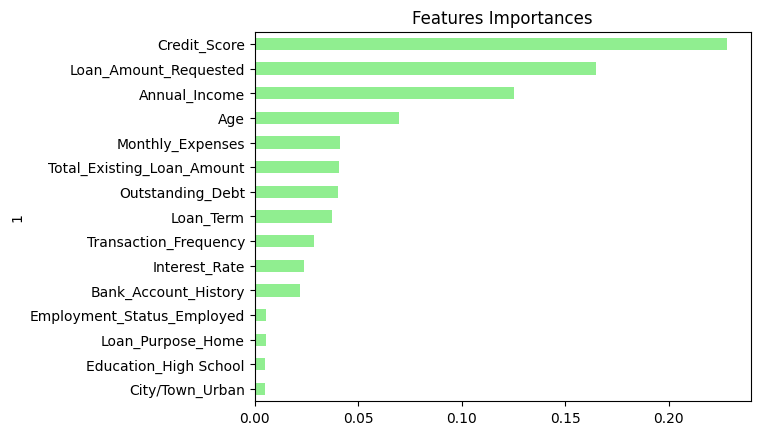

In [73]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_df.iloc[:15]["Feature Importances"].plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)
plt.gca().invert_yaxis()

In [ ]:
# Create Neural Networks as third test

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=128, activation="relu", input_dim=50))
# Second hidden layer
nn.add(tf.keras.layers.Dense(units=64, activation="relu"))
# Third Hidden Layer
nn.add(tf.keras.layers.Dense(units=32, activation='tanh'))
# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

In [ ]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [ ]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")
plt.show()

In [ ]:
history_df.plot(y="accuracy")
plt.show()